In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import the dataset

In [39]:
df = pd.read_csv("epi_cleaned.csv").select_dtypes(include = "number")
# Drop the ID column
df = df.drop(df.columns[0], axis = 1)
df.head()

,AMP,APR,BCA,BHV,BLC,CDA,CDO,CH4,CHA,COE,...,TC5,TCC,TCL,USD,UWD,VOE,WL5,WTA,WTL,WWT
0,0.000000,13.134830,0.021409,0.418988,14.917438,-0.051453,9780.0,666.00,-0.000152,0.198343,...,85.0,39.0,0.000060,466.408266,674.481233,0.015732,0.000000,71.499301,0.000000,0.00000
1,178.803804,9.532294,-0.111462,0.348171,0.945792,0.011736,5560.0,102.00,-0.000067,0.135896,...,7684.0,1241.0,0.002041,39.412070,116.095860,0.009952,0.738103,56.010690,0.002602,0.01853
2,26.558865,1.273220,0.006700,0.596696,69.293182,0.047309,184000.0,3160.00,0.013934,0.209900,...,84559.0,14169.0,0.011911,39.637104,127.632487,0.021838,0.000000,21.748026,0.000000,0.33120
3,0.000000,3.480068,-0.007744,0.563142,27.617290,0.024957,458.0,3.18,0.007221,0.144228,...,56.0,28.0,0.000567,0.913971,1.655597,0.011440,52.151606,10938.094877,0.003112,1.00000
4,1.400940,0.083847,0.015176,0.614766,27.555363,0.016730,27000.0,2170.00,0.000338,0.254907,...,1400956.0,298827.0,0.004250,1453.097805,2329.179532,0.064238,0.000000,7178.013668,0.000000,0.00000


# Run and plot PCA

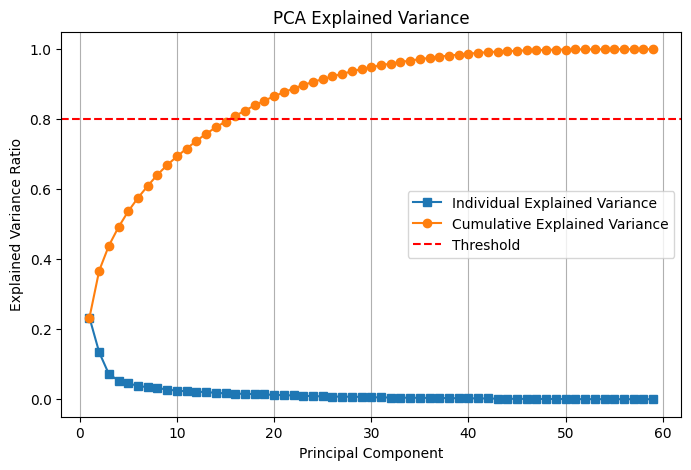

In [40]:
X = df.values
# Scale the data
X = (X - X.mean(axis = 0)) / X.std(axis = 0)

# Compute covariance matrix
covariance_matrix = np.cov(X, rowvar = False)

# Perform eigen decomposition
eigen_values, eigen_vectors = np.linalg.eigh(covariance_matrix)

# Sort eigenvalues/vectors
sorted_indices = np.argsort(eigen_values)[::-1]
eigen_values = eigen_values[sorted_indices]
eigen_vectors = eigen_vectors[:, sorted_indices]

# Plot explained variance
explained_variance_ratio = eigen_values / eigen_values.sum()
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 's-', label = "Individual Explained Variance")
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, 'o-', label = "Cumulative Explained Variance")
plt.axhline(y = 0.8, color = 'r', linestyle = '--', label = "Threshold")
plt.title("PCA Explained Variance")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.legend()
plt.grid(True, axis = 'x')
plt.show()

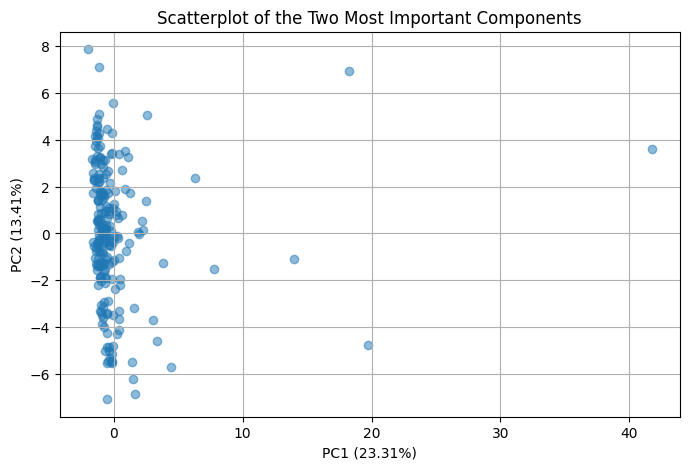

Number of components to reach 80% explained variance: 16


In [41]:
pc1 = X.dot(eigen_vectors[:, 0])
pc2 = X.dot(eigen_vectors[:, 1])

plt.figure(figsize = (8, 5))
plt.scatter(pc1, pc2, alpha = 0.5)
plt.xlabel("PC1 (%.2f%%)" % (explained_variance_ratio[0] * 100))
plt.ylabel("PC2 (%.2f%%)" % (explained_variance_ratio[1] * 100))
plt.title("Scatterplot of the Two Most Important Components")
plt.grid(True)
plt.show()

# Select enough principal components to reach threshold
n_components = np.argmax(cumulative_variance >= 0.80) + 1
print(f"Number of components to reach 80% explained variance: {n_components}")

# Project the data into a new dataframe
X_reduced = X.dot(eigen_vectors[:, :n_components])
pc_columns = [f"PC{i+1}" for i in range(n_components)]
df_pca = pd.DataFrame(X_reduced, columns=pc_columns, index=df.index)